# **SPOTIFY RECOMMENDATION SYSTEM** : ***Application of Supervised Machine Learning***

While trying to learn Machine Learning and Python on my own, I found this [webpage](https://thecleverprogrammer.com/2021/03/03/spotify-recommendation-system-with-machine-learning/#:~:text=The%20Spotify%20recommendation%20system%20uses,provide%20a%20better%20user%20experience) and this [Kaggle sample analysis of Spotify Data](https://www.kaggle.com/account/login?phase=startSignInTab&returnUrl=%2Fcode%2Faccountstatus%2Fspotify-songs-eda-andrecommendation-system).

This is part 1 of 2 of my project on Spotify recommender system. Part two will showcase applications of Unsupervised Machine Learning algorithms.
In this project, we have a dataset that contains preferred and not preferred song of a user, then from another dataset, we recommend songs based on the users preferenceses. I will try to put my own touch on the analysis by adopting a Hybrid GA-SVM Algorithm.

In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

## Data Preparation

Data definition and description

In [2]:
data_def = pd.read_excel("spotify_datadef.xlsx")
data_def

,audio feature,type,description
0,name,String,Name of the song
1,album,String,Name of the album
2,artist,String,Name of the song artist
3,release_date,Date,Song date release
4,length,Integer,The duration of the track in milliseconds.
5,popularity,Integer,Song popularity rank
6,acousticness,Float,A confidence measure from 0.0 to 1.0 of whethe...
7,danceability,Float,Danceability describes how suitable a track is...
8,energy,Float,Energy is a measure from 0.0 to 1.0 and repres...
9,instrumentalness,Float,Predicts whether a track contains no vocals. “...


Importing dataset that will be used to train and test the model

In [3]:
dataset_01 = pd.read_excel("spotify_dataset_01.xlsx")
dataset_01.head()

,name,album,artist,release_date,length,popularity,danceability,acousticness,danceability.1,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,response
0,BICHOTA,BICHOTA,KAROL G,2020-10-23 00:00:00,178946,96,0.863,0.2120,0.863,0.666,0.000493,0.103,-4.158,0.1520,163.908,4,0
1,Vegas Skies,Whisper War,The Cab,2008-04-07 00:00:00,277520,47,0.378,0.0298,0.378,0.463,0.000000,0.219,-6.071,0.0309,147.861,3,1
2,Wake Me Up,True,Avicii,2013-01-01 00:00:00,247426,85,0.532,0.0038,0.532,0.783,0.001200,0.161,-5.697,0.0523,124.080,4,0
3,"Gone, Gone, Gone",The World From The Side Of The Moon,Phillip Phillips,2012-01-01 00:00:00,209693,63,0.664,0.1290,0.664,0.642,0.000000,0.114,-5.961,0.0380,118.002,4,1
4,Baby I'm Yours,By Your Side,Breakbot,2012-09-17 00:00:00,215506,70,0.829,0.7260,0.829,0.792,0.000006,0.122,-3.755,0.0668,118.050,4,0


In [4]:
dataset_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              434 non-null    object 
 1   album             434 non-null    object 
 2   artist            434 non-null    object 
 3   release_date      434 non-null    object 
 4   length            434 non-null    int64  
 5   popularity        434 non-null    int64  
 6   danceability      434 non-null    float64
 7   acousticness      434 non-null    float64
 8   danceability.1    434 non-null    float64
 9   energy            434 non-null    float64
 10  instrumentalness  434 non-null    float64
 11  liveness          434 non-null    float64
 12  loudness          434 non-null    float64
 13  speechiness       434 non-null    float64
 14  tempo             434 non-null    float64
 15  time_signature    434 non-null    int64  
 16  response          434 non-null    int64  
dt

The dataset does not contain any missing values. We also load the second dataset. This dataset will be used for the deployment of the model later on. Notice that this does not have a column `response`. In modeling, we will use the `response` column from `dataset_01` as our response variable in the supervised machine learning model. 

In [5]:
dataset_02 = pd.read_excel("spotify_dataset_02.xlsx")
dataset_02.head()

,name,album,artist,release_date,length,popularity,danceability,acousticness,danceability.1,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,positions,positions,Ariana Grande,2020-10-23,172324,68,0.736,0.4680,0.736,0.802,0.000000,0.0940,-4.759,0.0864,144.005,4
1,Mood (feat. iann dior),Mood (feat. iann dior),24kGoldn,2020-07-24,140525,98,0.700,0.2210,0.700,0.722,0.000000,0.2720,-3.558,0.0369,90.989,4
2,Meant For feat. G Herbo,Meant For feat. G Herbo,Amaru Cloud,2020-12-04,157453,53,0.850,0.5290,0.850,0.583,0.000000,0.1170,-10.550,0.3260,141.022,4
3,Dynamite,Dynamite (DayTime Version),BTS,2020-08-28,199053,89,0.746,0.0112,0.746,0.765,0.000000,0.0936,-4.410,0.0993,114.044,4
4,i don't wanna like you yet,self,kennedi,2020-10-30,166308,48,0.703,0.0243,0.703,0.682,0.000748,0.1640,-7.336,0.0673,93.410,4


In [6]:
dataset_02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              100 non-null    object        
 1   album             100 non-null    object        
 2   artist            100 non-null    object        
 3   release_date      100 non-null    datetime64[ns]
 4   length            100 non-null    int64         
 5   popularity        100 non-null    int64         
 6   danceability      100 non-null    float64       
 7   acousticness      100 non-null    float64       
 8   danceability.1    100 non-null    float64       
 9   energy            100 non-null    float64       
 10  instrumentalness  100 non-null    float64       
 11  liveness          100 non-null    float64       
 12  loudness          100 non-null    float64       
 13  speechiness       100 non-null    float64       
 14  tempo             100 non-n

Note that in both datasets, the column `danceability` was duplicated. We will just drop the column `danceability.1` in the final datasets.

In [7]:
dataset_01 = dataset_01.drop(columns = ['danceability.1'])
dataset_02 = dataset_02.drop(columns = ['danceability.1'])

In [8]:
dataset_01.head()

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,response
0,BICHOTA,BICHOTA,KAROL G,2020-10-23 00:00:00,178946,96,0.863,0.2120,0.666,0.000493,0.103,-4.158,0.1520,163.908,4,0
1,Vegas Skies,Whisper War,The Cab,2008-04-07 00:00:00,277520,47,0.378,0.0298,0.463,0.000000,0.219,-6.071,0.0309,147.861,3,1
2,Wake Me Up,True,Avicii,2013-01-01 00:00:00,247426,85,0.532,0.0038,0.783,0.001200,0.161,-5.697,0.0523,124.080,4,0
3,"Gone, Gone, Gone",The World From The Side Of The Moon,Phillip Phillips,2012-01-01 00:00:00,209693,63,0.664,0.1290,0.642,0.000000,0.114,-5.961,0.0380,118.002,4,1
4,Baby I'm Yours,By Your Side,Breakbot,2012-09-17 00:00:00,215506,70,0.829,0.7260,0.792,0.000006,0.122,-3.755,0.0668,118.050,4,0


In [9]:
dataset_02.head()

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,positions,positions,Ariana Grande,2020-10-23,172324,68,0.736,0.4680,0.802,0.000000,0.0940,-4.759,0.0864,144.005,4
1,Mood (feat. iann dior),Mood (feat. iann dior),24kGoldn,2020-07-24,140525,98,0.700,0.2210,0.722,0.000000,0.2720,-3.558,0.0369,90.989,4
2,Meant For feat. G Herbo,Meant For feat. G Herbo,Amaru Cloud,2020-12-04,157453,53,0.850,0.5290,0.583,0.000000,0.1170,-10.550,0.3260,141.022,4
3,Dynamite,Dynamite (DayTime Version),BTS,2020-08-28,199053,89,0.746,0.0112,0.765,0.000000,0.0936,-4.410,0.0993,114.044,4
4,i don't wanna like you yet,self,kennedi,2020-10-30,166308,48,0.703,0.0243,0.682,0.000748,0.1640,-7.336,0.0673,93.410,4


Now that the datasets are ready, we now explore our data in preparation to modelling.

## **Exploratory Data Analysis**
As mentioned, we will obtain a supervised machine learning model. Prior to that, we perform exploratory data analysis on the independent variables and potential effects on the response.

### *Response*

<AxesSubplot: xlabel='response', ylabel='count'>

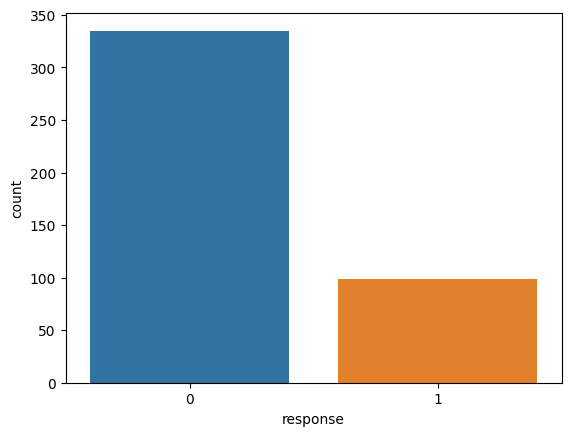

In [49]:
sns.countplot(x ='response', data = dataset_01)

In [60]:
dataset_01.response.value_counts()

0    335
1     99
Name: response, dtype: int64

Note that the response value counts are imbalanced, i.e., there are more 0 than 1 by a large margin (355 0s and 99 1s).

### ***audio feature** vs **response***
Since the response variable is a binary (0 and 1), boxplots will be used to determine preference of the user based on the audio features of the songs.

<AxesSubplot: xlabel='response', ylabel='energy'>

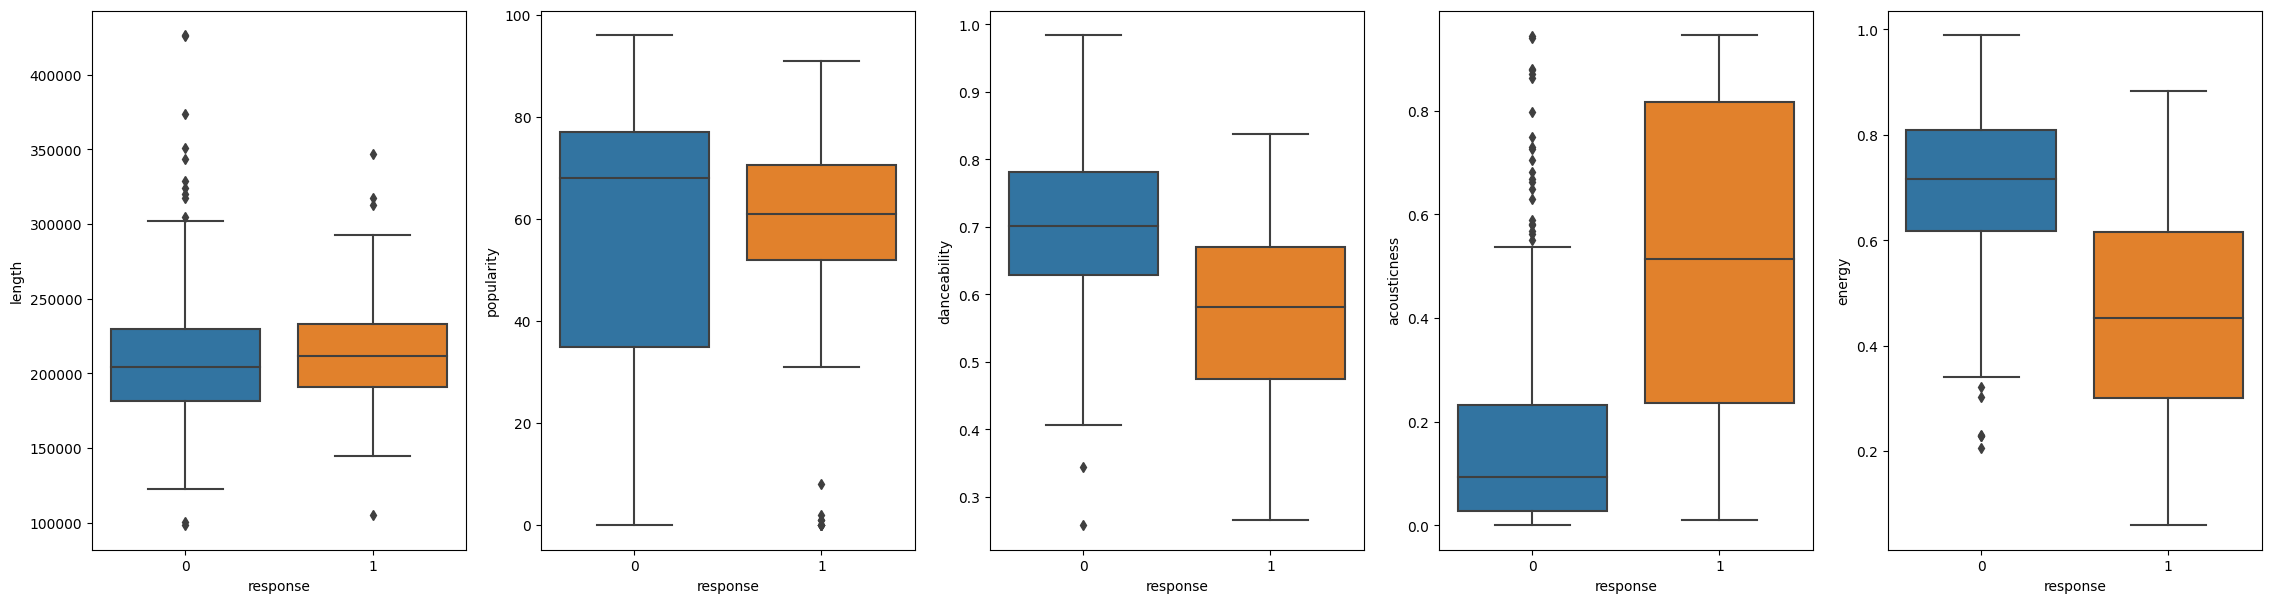

In [10]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize = (28,7))
sns.boxplot(data=dataset_01, x = "response", y="length",  ax=ax1)
sns.boxplot(data=dataset_01, x = "response", y="popularity",  ax=ax2)
sns.boxplot(data=dataset_01, x = "response", y="danceability", ax=ax3)
sns.boxplot(data=dataset_01, x = "response", y="acousticness", ax=ax4)
sns.boxplot(data=dataset_01, x = "response", y="energy", ax=ax5)

<AxesSubplot: xlabel='response', ylabel='tempo'>

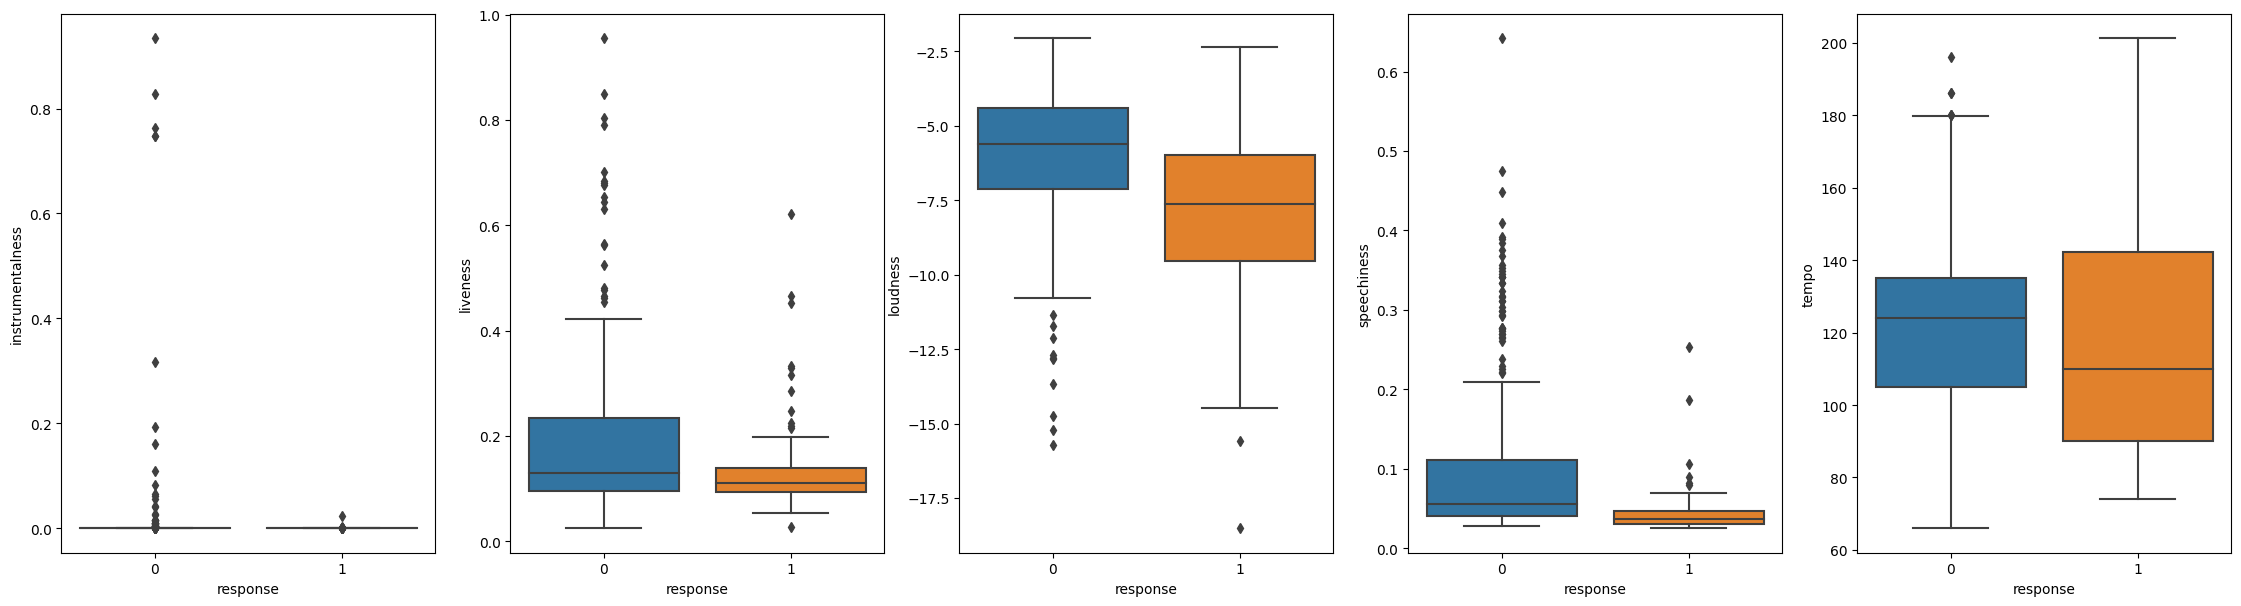

In [11]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize = (28,7))
sns.boxplot(data=dataset_01, x = "response", y = "instrumentalness", ax=ax1)
sns.boxplot(data=dataset_01, x = "response", y = "liveness", ax=ax2)
sns.boxplot(data=dataset_01, x = "response", y = "loudness",  ax=ax3)
sns.boxplot(data=dataset_01, x = "response", y = "speechiness", ax=ax4)
sns.boxplot(data=dataset_01, x = "response", y = "tempo", ax=ax5)

<AxesSubplot: xlabel='time_signature', ylabel='count'>

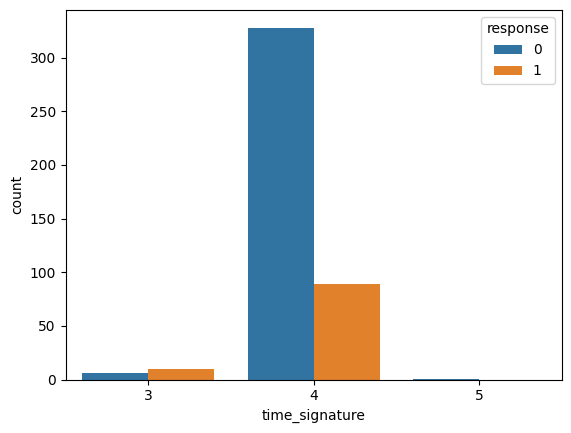

In [12]:
# since time_signature is not a continuous variable, we will use barcharts instead.
sns.countplot(x ='time_signature', hue = 'response', data = dataset_01)

From the plots, we can hypothesize that the specific Spotify user has the following preferences:
- Non-danceable
- Acoustic music
- Songs with low energy
- Soft music (low loudness)

For the other audio features, they may not have significant contributions in the predictive model.

### *Correlation*
We will obtain the correlation between the the audio features and visualize using a correlation matrix heatmap. Generally, in linear models, independent variables must be uncorrelated from each other to avoid multicollinearity. Note that we will exclude `time_signature` since this is a categorical variable. Most of the songs are 4/4 time signature anyway, so we can hypothesize that this feature does not contribute to the model well.

<AxesSubplot: >

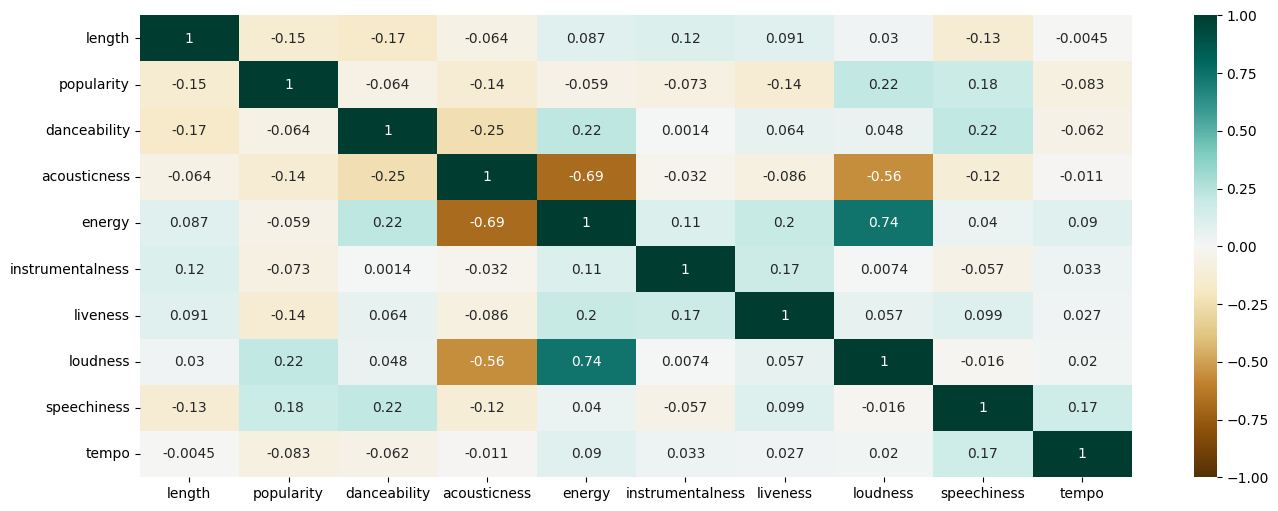

In [69]:
feature = dataset_01.drop(columns=['name', 'album', 'artist', 'release_date', 'time_signature', 'response'])
cormat = feature.corr()
plt.figure(figsize=(16, 6))
sns.heatmap(cormat, vmin=-1, vmax=1,annot = True,cmap='BrBG')

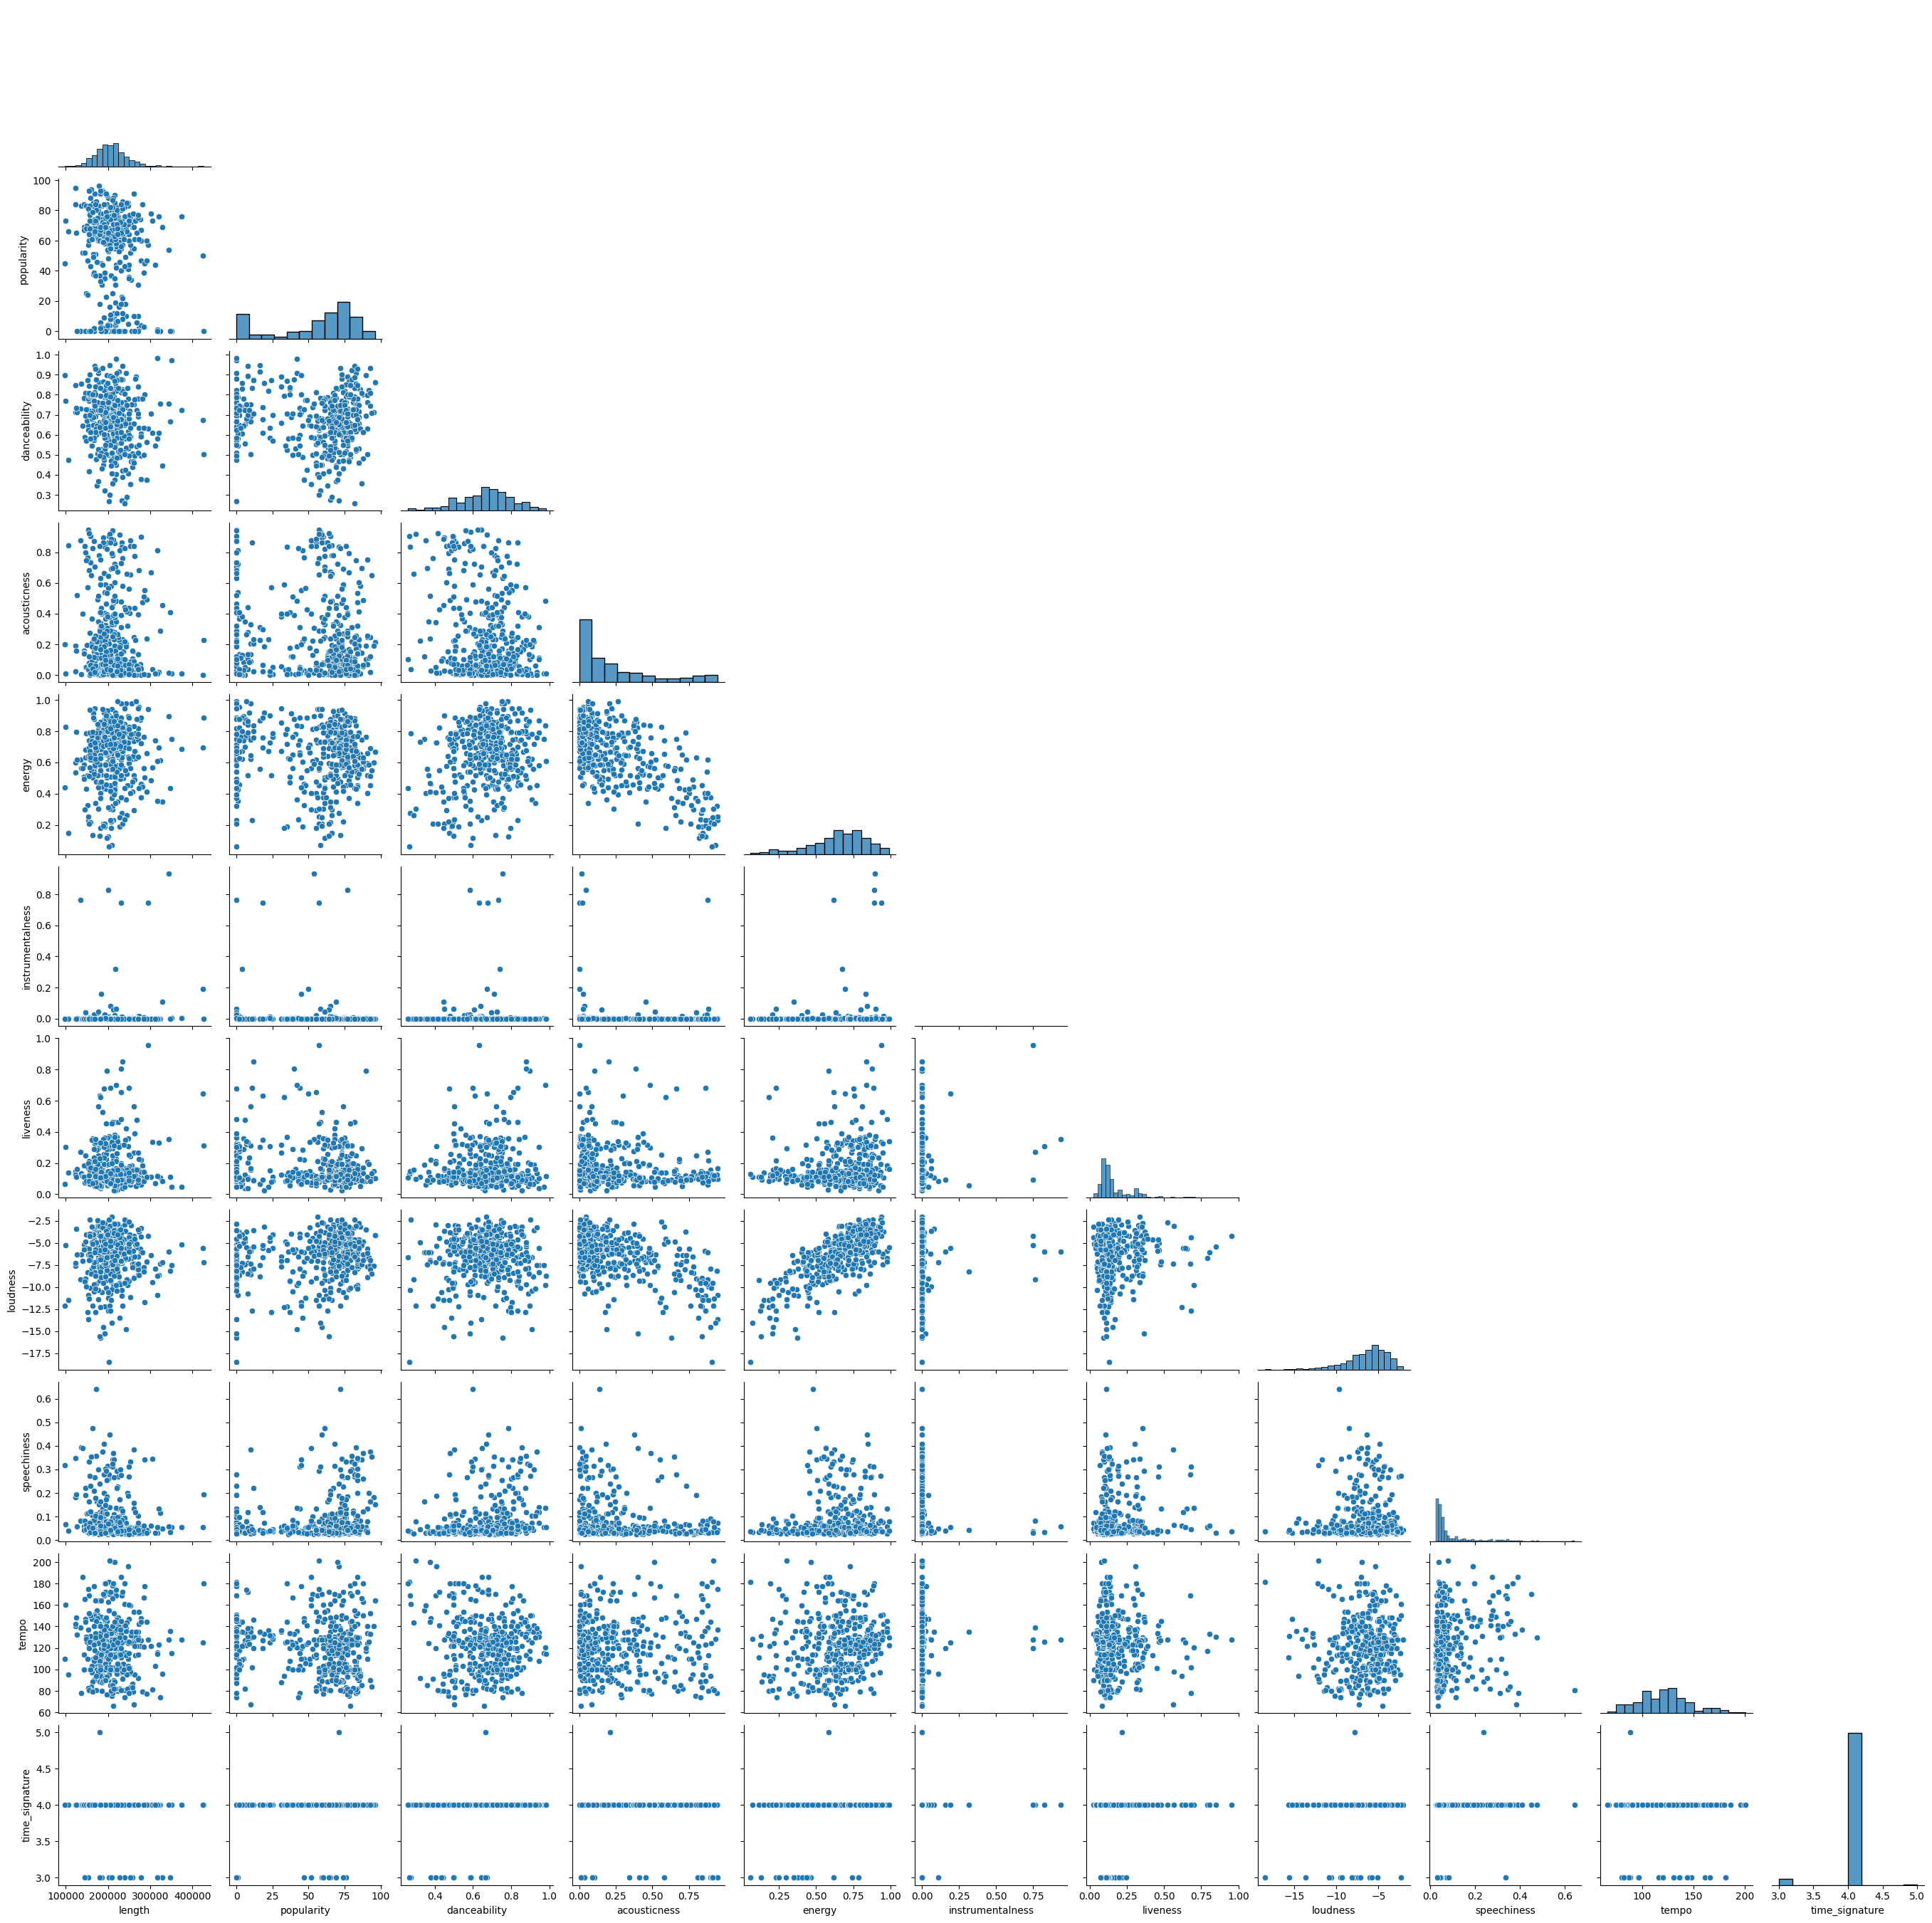

In [19]:
sns.pairplot(feature,corner=True)

Only `loudness` and `energy` have a moderate positive correlation, while `acousticness` and `energy` have a moderate negative correlation. For the other pairs of audio features, scatterplots also show that they are not correlated with each other. 

## **Modelling: Making the Recommender System**

### *Recommending to a single user*
**Support Vector Machine** (SVM) is a supervised machine learning algorithm capable of performing classification, regression, and even outlier detection. We can use this to create a model that recommends a song to the certain user based on their response and preference. `scikit-learn` has built in functions in performing SVM.

Prior to modelling, we split our dataset to training and test sets.

In [21]:
target = dataset_01['response']

In [80]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test , y_train, y_test = train_test_split(feature, target, test_size=0.3,random_state=109) # 70% training and 30% test

In [81]:
X_train

,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo
59,350853,0,0.972,0.00914,0.749,0.001240,0.0474,-7.482,0.0555,115.195
53,212546,0,0.499,0.88100,0.228,0.064400,0.2160,-9.957,0.0305,112.849
125,212862,78,0.612,0.11200,0.840,0.000000,0.1160,-3.145,0.0509,129.042
206,126613,0,0.714,0.52200,0.615,0.003380,0.1610,-6.276,0.0573,132.666
118,243559,42,0.910,0.18800,0.360,0.000000,0.1130,-14.735,0.0733,135.805
...,...,...,...,...,...,...,...,...,...,...
399,170641,73,0.842,0.02650,0.789,0.000000,0.3550,-8.733,0.1780,111.113
141,247160,83,0.617,0.04980,0.635,0.000014,0.1640,-6.769,0.0317,103.019
432,222040,64,0.670,0.06040,0.838,0.000611,0.1590,-4.031,0.0362,104.998
245,220573,76,0.583,0.01410,0.695,0.000000,0.0527,-5.336,0.0423,104.879


Support Vector Machine algorithms are **not scale invariant**, so it is highly recommended to **scale your data**. For example, scale each attribute on the input vector X to [0,1] or [-1,+1], or standardize it to have mean 0 and variance 1. Note that the same scaling must be applied to the test vector to obtain meaningful results. `Pipeline` can assist us in creating a workflow of scaling then performing the fitting or predicting of the classifier `clf` object.

In [82]:
# importing svm model
from sklearn import svm
from sklearn.pipeline import make_pipeline # for the pipeline process
from sklearn.preprocessing import StandardScaler # scaling the data first
from sklearn.svm import SVC

# Create a SVM classifier
clf = make_pipeline(StandardScaler(), SVC(kernel = 'linear'))

#Train the model using the training sets
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(kernel='linear'))])

In [88]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0]


#### *Evaluating the Model*
Let's estimate how accurate does the classifier performs in terms of recommending songs to the user.

In [91]:
from sklearn import metrics

# Confusion Matrix
print(metrics.confusion_matrix(y_test, y_pred))

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

[[91  5]
 [17 18]]
Accuracy: 0.8320610687022901
Precision: 0.782608695652174
Recall: 0.5142857142857142


83% of the responses have been predicted accurately. We can still increase this. 
Prior to modelling, we pointed out the following caveats:
- Target variable have imbalanced responses.
- Some features do not have significant contribution to the model.

#### *Tuning Hyperparameters: Dealing with imbalance data*
From our exploratory data analysis, we have showed that the count of 0 response is almost double the count of 1 response. SVMs are effective models for binary classification tasks, although by default, they are not effective at imbalanced classification.

The following are the parameters used by SVM:

- **Kernel**: The main function of the kernel is to transform the given dataset input data into the required form. There are various types of functions such as linear, polynomial, and radial basis function (RBF). Polynomial and RBF are useful for non-linear hyperplane. Polynomial and RBF kernels compute the separation line in the higher dimension. In some of the applications, it is suggested to use a more complex kernel to separate the classes that are curved or nonlinear. This transformation can lead to more accurate classifiers.
- **Regularization**: Regularization parameter in python's Scikit-learn C parameter used to maintain regularization. Here C is the penalty parameter, which represents misclassification or error term. The misclassification or error term tells the SVM optimization how much error is bearable. This is how you can control the trade-off between decision boundary and misclassification term. A smaller value of C creates a small-margin hyperplane and a larger value of C creates a larger-margin hyperplane.
- **Gamma**: A lower value of Gamma will loosely fit the training dataset, whereas a higher value of gamma will exactly fit the training dataset, which causes over-fitting. In other words, you can say a low value of gamma considers only nearby points in calculating the separation line, while the a value of gamma considers all the data points in the calculation of the separation line.

We will use repeated cross-validation to evaluate the model, with three repeats of 10-fold cross-validation. The mode performance will be reported using the mean ROC area under curve (ROC AUC) averaged over repeats and all folds.

In [66]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [67]:
# define model
model = svm.SVC(gamma='scale')

# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)

# summarize performance
print('Mean ROC AUC: %.3f' % np.mean(scores))

NameError: name 'mean' is not defined

### Deployment: Recommending top 10 songs to User1
Given the preferences of User 1 from `dataset_0`, we recommend 10 songs from `dataset_02` to this user by deploying our model

### Generalization: recommending to multiple users
Now, we have created a model that recommends new songs to a single user. How about for the case for two users? 10 users? Or Millions of users? Do we need to perform exploratory data analysis everytime? For each individual, do we use the same subset of audio features? Do we need to manually set the hyperparameters everytime? We want to automate these steps.

There are two prevalent approaches for building recommender systems: content-based recommending and collaborative filtering (CF). Min and Han (2005) proposed an Support Vector Machine (SVM) based recommender system. They improved the system by using Genetic Algorithm (GA)  to optimize both the feature subset and parameters of SVM simultaneously for the recommendation problem.